# Predicting the Sale price for Bulldozers

## 1. problem definition

we are trying to use independent variables to predict the **saleprice**


## 2. data

    * Train.csv is the training set containing data through the end of 2011.
    
    * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
    
    * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
https://www.kaggle.com/c/bluebook-for-bulldozers/data


## 3. evaluation
    * The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation
## 4. features
## 5. modeling
## 6. experiments

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [4]:
df = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [9]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

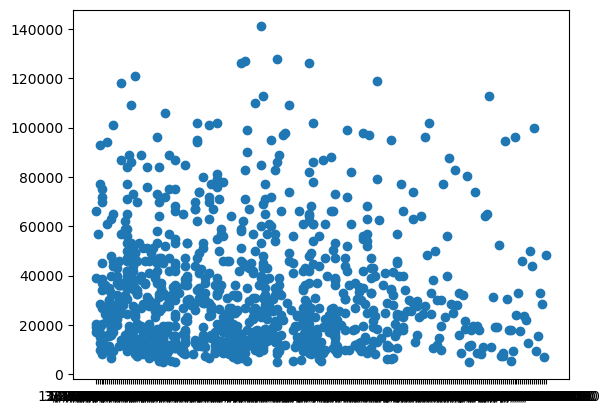

In [8]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: >

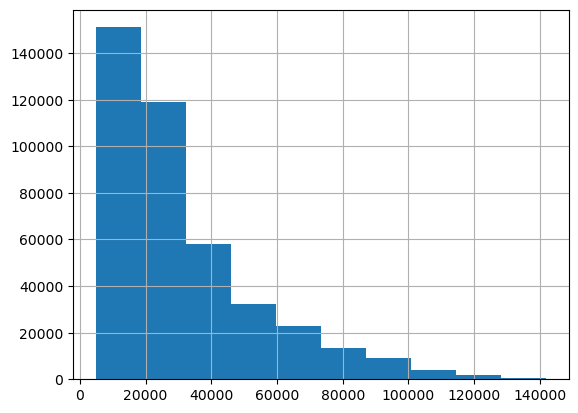

In [9]:
df.SalePrice.hist()

### parsing dates

when working with time series data we want to time & date component as possible

we can do that by telling pandas which columns has dates using " parse_dates " parameter

In [1]:
# import again but parse darta
df = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

NameError: name 'pd' is not defined

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.saledate.dtype

dtype('O')

In [15]:
df["saledate"]

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

### Its a good idea to sort daat by date

In [16]:
df.sort_values("saledate", inplace=True, ascending=True)

In [17]:
df['saledate'].head(20)

405675     1/1/2012 0:00
268962    1/10/2003 0:00
221519    1/10/2003 0:00
283617    1/10/2003 0:00
122970    1/10/2003 0:00
121285    1/10/2003 0:00
237812    1/10/2003 0:00
10704     1/10/2005 0:00
51910     1/10/2008 0:00
11464     1/10/2008 0:00
11463     1/10/2008 0:00
5103      1/10/2008 0:00
175249    1/10/2008 0:00
9689      1/10/2008 0:00
536       1/10/2008 0:00
7279      1/10/2008 0:00
191798    1/10/2008 0:00
174911    1/10/2008 0:00
11428     1/10/2008 0:00
2117      1/10/2008 0:00
Name: saledate, dtype: object

### make a copy for the original data

In [18]:
df_tmp = df.copy()

### add datetime parameters for saledate column

In [23]:
# Ensure the 'saledate' column is in datetime format
df_tmp['saledate'] = pd.to_datetime(df_tmp['saledate'], errors='coerce')

# Now you can safely extract the year, month, day, etc.
df_tmp["saleyear"] = df_tmp.saledate.dt.year
df_tmp["salemonth"] = df_tmp.saledate.dt.month
df_tmp["saleday"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [24]:
# now we enriched our dataframe with date time features lets drop the saledate column

df_tmp = df_tmp.drop(["saledate"], axis=1)

In [25]:
# which state has higher value?
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Modelling

enough EDA! lets start doing model driven EDA

### convert string to categories 

a way to convert our data into numbers

In [26]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

this expected to return **True** so i checked the type of UsageBand and found that NaN are considered as float objects

In [27]:
# find columns that contain strings

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [28]:
# turning string values into categories

for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content): #used instead of  pd.api.types.is_string_dtype(content) cause strings considred as object   
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [29]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 405675 to 22602
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         7481

In [30]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [31]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## fill messing values

In [32]:
# turning string values into categories

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content): #used instead of  pd.api.types.is_string_dtype(content) cause strings considred as object   
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [33]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum() > 0:
            # Add a binary column to indicate missing data
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            # Fill missing values with the median
            df_tmp[label] = content.fillna(content.median())


In [34]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
405675,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,NaN,D65E12,...,None or Unspecified,NaN,NaN,2012,1,1,6,1,False,False
268962,1806686,8000.0,1077085,9549,132,2.0,1998,0.0,NaN,751,...,NaN,NaN,NaN,2003,1,10,4,10,False,True
221519,1691274,20500.0,1233251,22933,132,2.0,1994,0.0,NaN,EX120-3,...,NaN,NaN,NaN,2003,1,10,4,10,False,True
283617,1895558,9000.0,1458959,6054,132,2.0,1994,0.0,NaN,B502B,...,NaN,NaN,NaN,2003,1,10,4,10,False,True
122970,1467430,17500.0,1339914,4200,132,2.0,1988,0.0,NaN,E120B,...,NaN,NaN,NaN,2003,1,10,4,10,False,True


In [35]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
405675,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,NaN,D65E12,...,None or Unspecified,NaN,NaN,2012,1,1,6,1,False,False
268962,1806686,8000.0,1077085,9549,132,2.0,1998,0.0,NaN,751,...,NaN,NaN,NaN,2003,1,10,4,10,False,True
221519,1691274,20500.0,1233251,22933,132,2.0,1994,0.0,NaN,EX120-3,...,NaN,NaN,NaN,2003,1,10,4,10,False,True
283617,1895558,9000.0,1458959,6054,132,2.0,1994,0.0,NaN,B502B,...,NaN,NaN,NaN,2003,1,10,4,10,False,True
122970,1467430,17500.0,1339914,4200,132,2.0,1988,0.0,NaN,E120B,...,NaN,NaN,NaN,2003,1,10,4,10,False,True


In [36]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### filling categorical variables data into numbers

In [37]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
df_tmp['UsageBand'].apply(type).value_counts()


UsageBand
<class 'str'>    73670
Name: count, dtype: int64

In [39]:
df_tmp['UsageBand']

405675       NaN
268962       NaN
221519       NaN
283617       NaN
122970       NaN
           ...  
19497        Low
103424       NaN
19280        Low
19335       High
22602     Medium
Name: UsageBand, Length: 412698, dtype: category
Categories (3, object): ['High' < 'Low' < 'Medium']

In [40]:
pd.Categorical(df_tmp['state']).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True, categories_dtype=object)

In [41]:
pd.Categorical(df_tmp['UsageBand']).codes 

array([-1, -1, -1, ...,  1,  0,  2], dtype=int8)

In [42]:
# turn categorical variables data into numbers and fill messing
# so if the object is not numerical, then add a binary column to indicate wether sample had messing variable, 


for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label + "_is_messing"] = pd.isnull(content)

        df_tmp[label] = pd.Categorical(content).codes + 1 # turn categories into numbers and add +1 to make sure all are positive values



In [43]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_messing     0
Blade_Type_is_messing           0
Travel_Controls_is_messing      0
Differential_Type_is_messing    0
Steering_Controls_is_messing    0
Length: 103, dtype: int64

all data are numeric and filled by numbers. now we should be able to build ML model

In [44]:
X = df_tmp.drop("SalePrice", axis=1)

y = df_tmp["SalePrice"]

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 405675 to 22602
Columns: 102 entries, SalesID to Steering_Controls_is_messing
dtypes: bool(46), float64(2), int16(4), int32(5), int64(5), int8(40)
memory usage: 70.1 MB


In [46]:
X.head().T

,405675,268962,221519,283617,122970
SalesID,4449186,1806686,1691274,1895558,1467430
MachineID,2318824,1077085,1233251,1458959,1339914
ModelID,26964,9549,22933,6054,4200
datasource,173,132,132,132,132
auctioneerID,99.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...
Backhoe_Mounting_is_messing,False,True,True,True,True
Blade_Type_is_messing,False,True,True,True,True
Travel_Controls_is_messing,False,True,True,True,True
Differential_Type_is_messing,True,True,True,True,True


## Splitting data into train/validation set

In [47]:
# Train data all data untill 2012
# valid data from Jan 2012 till April 2012

df_tmp.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [48]:
# validation set is 2012 saleyear

df_train = df_tmp[df_tmp.saleyear != 2012]
df_val = df_tmp[df_tmp.saleyear == 2012]

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [49]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_messing,Stick_Length_is_messing,Thumb_is_messing,Pattern_Changer_is_messing,Grouser_Type_is_messing,Backhoe_Mounting_is_messing,Blade_Type_is_messing,Travel_Controls_is_messing,Differential_Type_is_messing,Steering_Controls_is_messing
268962,1806686,1077085,9549,132,2.0,1998,0.0,0,1410,407,...,True,True,True,True,True,True,True,True,True,True
221519,1691274,1233251,22933,132,2.0,1994,0.0,0,2611,818,...,False,False,False,False,False,True,True,True,True,True
283617,1895558,1458959,6054,132,2.0,1994,0.0,0,1848,584,...,False,False,False,False,False,True,True,True,True,True
122970,1467430,1339914,4200,132,2.0,1988,0.0,0,2462,752,...,False,False,False,False,False,True,True,True,True,True
121285,1463739,1338154,7057,132,2.0,1993,0.0,0,511,178,...,False,False,False,False,False,True,True,True,True,True


In [50]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building evaluation function (RMSLE)

In [51]:
%%time
#telling us how many time it takes to run the code, It expects the code to be contained within a single cell

# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42) 
# Fit model
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [53]:
# create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score 

def rmsle(y_test, y_preds):
    #calculate root mean squared log error

    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# evaluate model in different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "valid MAE": mean_absolute_error(y_valid, valid_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "valid RMSLE": rmsle(y_valid, valid_preds),
        "training R2": r2_score(y_train, train_preds),
        "valid R2": r2_score(y_valid, valid_preds)
    }
    return scores


In [54]:
show_scores(model)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning: invalid value encountered in divide
  y_hat /= len(self.estimators_)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning: invalid value encountered in divide
  y_hat /= len(self.estimators_)


ValueError: Input contains NaN.

## tuning hyperparameters with RandomizedSearchCV  

In [71]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# a grid to check the best hyperparameters
Random_forest_grid = {
    "n_estimators": np.arange(10,100,10), 
    "max_depth": [None, 3, 5, 10], #A deeper tree can fit the training data better, but it can also lead to overfitting
    "min_samples_split": np.arange(2,20,2), # specifies the minimum number of samples required to split an internal node
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5, 1.0, "sqrt", "log2", None]
    #,"max_samples":[10000] #pick only that number of samples from the training data
}

#instantiate model
Random_forest_model = RandomizedSearchCV(
        RandomForestRegressor(n_jobs=-1,random_state=42),
        param_distributions=Random_forest_grid,
        n_iter=100, #pick n different combinations of grid parameters, to assign them to our Random Forest Regressor
        cv=5,
        verbose= True)

#fitting data
Random_forest_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\Test\projects\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 

285 fits failed out of a total of 1000.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

285 fits failed with the following error:

Traceback (most recent call last):

  File "C:\Users\Test\projects\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "C:\Users\Test\projects\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper

    estimator._validate_params()

  File "C:\Users\Test\projects\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_p

CPU times: total: 24min 59s

Wall time: 4h 1min 51s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [82]:
Random_forest_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': None}

In [74]:
# Evaluate the model
show_scores(Random_forest_model)

{'Training MAE': 2371.852540742571,
 'valid MAE': 5961.19888320445,
 'Training RMSLE': 0.11990264222014035,
 'valid RMSLE': 0.24699191845996124,
 'training R2': 0.9727363379818159,
 'valid R2': 0.8816765573787403}

## Train the model with best parameters

these were found after 100 **n_iter** of RandomizedSearchCV

In [55]:
%%time

# most ideal hyperparameters
ideal_model = RandomForestRegressor(
    random_state=42,
    n_jobs= -1,
    n_estimators= 40,
    min_samples_split= 14,
    min_samples_leaf=1,
    max_samples= None,
    max_features= 0.5,
    max_depth=None
    )

# fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: user 3min 49s, sys: 536 ms, total: 3min 50s
Wall time: 60 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [56]:
show_scores(ideal_model)

{'Training MAE': 2955.1996918705922,
 'valid MAE': 5980.939178704664,
 'Training RMSLE': 0.14454664425679492,
 'valid RMSLE': 0.2475512706993428,
 'training R2': 0.9588358374597652,
 'valid R2': 0.8806383918708848}

valid RMSLE': 0.2452416398953833

after adding max_depth valid RMSLE': 0.24524163989538328

now i will try find best parameters on all training data and after 200 n_iter of RandomizedSearchCV, then check the ideal model again 

found:  'valid RMSLE': 0.24699191845996124 so the previous hyperparameters are better

# You can ignore the previous code and start running the notebook from this point ---------------------------------------------------------------------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## Make predictions on test data

In [125]:
df = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)


#Import the test data 
df_test = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/Test.csv",
                low_memory=False)

## Preprocessing the test data

In [126]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # Ensure saledate is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df.saledate):
        df['saledate'] = pd.to_datetime(df.saledate, errors='coerce')

    # Extract datetime features
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with median and handle missing values
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column indicating missing data
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Encode categorical columns and handle missing data
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df


# process the training data
df = preprocess_data(df)

# process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


We have found that some features are not important for our prediction after checking feature importance so i will drop the following columns. 

In [127]:
not_important = [
    'Turbocharged_is_missing',
    'fiModelDesc_is_missing',
    'fiProductClassDesc_is_missing',
    'state_is_missing',
    'ProductGroup_is_missing',
    'ProductGroupDesc_is_missing',
    'fiBaseModel_is_missing'
]

# Drop the columns if they exist in the DataFrame
df = df.drop(columns=[col for col in not_important if col in df.columns], axis=1)
df_test = df_test.drop(columns=[col for col in not_important if col in df_test.columns], axis=1)

In [128]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [129]:
# validation set is 2012 saleyear

df_train = df[df.saleYear != 2012]
df_val = df[df.saleYear == 2012]

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

#---------------------------------------------------------------------------------
# create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score 

def rmsle(y_test, y_preds):
    #calculate root mean squared log error

    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# evaluate model in different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "valid MAE": mean_absolute_error(y_valid, valid_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "valid RMSLE": rmsle(y_valid, valid_preds),
        "training R2": r2_score(y_train, train_preds),
        "valid R2": r2_score(y_valid, valid_preds)
    }
    return scores

In [131]:
%%time

# most ideal hyperparameters
ideal_model = RandomForestRegressor(
    random_state=42,
    n_jobs= -1,
    n_estimators= 40,
    min_samples_split= 14,
    min_samples_leaf=1,
    max_samples= None,
    max_features= 0.5,
    max_depth=None
    )

# fit the ideal model
ideal_model.fit(X_train,y_train)
#---------------------------------------------------------------------------------
show_scores(ideal_model)

CPU times: user 3min 10s, sys: 868 ms, total: 3min 11s
Wall time: 52.5 s


{'Training MAE': 2957.4861312387266,
 'valid MAE': 5944.3440347129335,
 'Training RMSLE': 0.14468919374566228,
 'valid RMSLE': 0.24596447329779486,
 'training R2': 0.9587130541096363,
 'valid R2': 0.881893717592724}

In [132]:
len(X_train.columns), len(df_test.columns)

(95, 94)

In [133]:
# we can use sets to find the messing column
missing_columns = set(X_train.columns) - set(df_test.columns)
missing_columns

{'auctioneerID_is_missing'}

In [134]:
# manually adjust df_test to have messing column 'auctioneerID_is_missing' 
for i in missing_columns:
    df_test[i] = False

In [135]:
# Make sure features are in the same dimension and order
# Reorder df_test to match X_train
df_test = df_test[X_train.columns]

len(X_train.columns), len(df_test.columns)

(95, 95)

In [136]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [137]:
#making prediction on test data 
test_preds = ideal_model.predict(df_test)

test_preds

array([18270.02617746, 15820.13145457, 47914.91249409, ...,
       12997.5713225 , 16349.6242481 , 26817.52151659])

these predictions are not in the same format for kaggle competetion: https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [138]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

In [139]:
df_preds

,SalesID,SalesPrice
0,1227829,18270.026177
1,1227844,15820.131455
2,1227847,47914.912494
3,1227848,61484.573382
4,1227863,58286.882310
...,...,...
12452,6643171,42908.172952
12453,6643173,11315.943273
12454,6643184,12997.571323
12455,6643186,16349.624248


We can't Evaluate the test data cause we don't have the truth label

In [140]:
"""
# Export current tmp dataframe
df_preds.to_csv("C:/Users/Test/projects/sample_project_1/Time_Series_Data/bluebook-for-bulldozers/bluebook-for-bulldozers/my_test_predictions.csv", index=False)

"""

'\n# Export current tmp dataframe\ndf_preds.to_csv("C:/Users/Test/projects/sample_project_1/Time_Series_Data/bluebook-for-bulldozers/bluebook-for-bulldozers/my_test_predictions.csv", index=False)\n\n'

### Feature Importance ------------------------------------------------------
which attributes are most important for predicting the target variable?

In [141]:
# find feature importance of our best model
feature_importances = ideal_model.feature_importances_
feature_importances

array([3.41445718e-02, 2.48008256e-02, 4.25481253e-02, 1.83172536e-03,
       3.37330945e-03, 1.99825101e-01, 3.09107413e-03, 9.62180126e-04,
       4.01830252e-02, 4.61842917e-02, 6.99207859e-02, 4.23188559e-03,
       1.51289829e-02, 1.65298646e-01, 4.26806921e-02, 5.97425813e-03,
       3.55766299e-03, 1.71740184e-03, 3.72549148e-03, 5.32655766e-02,
       5.90788299e-04, 3.76176803e-04, 8.88973623e-04, 2.35623429e-04,
       1.08474659e-03, 2.65706260e-05, 5.69420413e-05, 1.30430264e-02,
       2.28685245e-03, 6.62748761e-03, 4.79087741e-03, 4.19772431e-03,
       3.01152284e-03, 1.66944209e-04, 4.19699909e-03, 7.87729850e-03,
       8.46909074e-04, 1.05496280e-02, 8.08334318e-04, 2.80841447e-03,
       9.82188466e-04, 1.21627635e-03, 9.72992970e-04, 6.10980993e-04,
       4.82285768e-04, 3.40865532e-04, 3.77903542e-04, 2.89089320e-03,
       1.10051208e-03, 2.28073303e-04, 3.65675711e-04, 7.36213152e-02,
       3.84059938e-03, 5.60863024e-03, 2.88451995e-03, 9.85565532e-03,
      

In [148]:
def plot_features(columns, feature_importances, n=20): #to plot the top 20 values out of the 102
    feature_importances_df = (pd.DataFrame({
        "features": columns,
        "feature_importances": feature_importances
    }).sort_values("feature_importances", ascending=False).reset_index(drop=True))

    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(feature_importances_df["features"][:n], feature_importances_df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importance")
    ax.invert_yaxis()

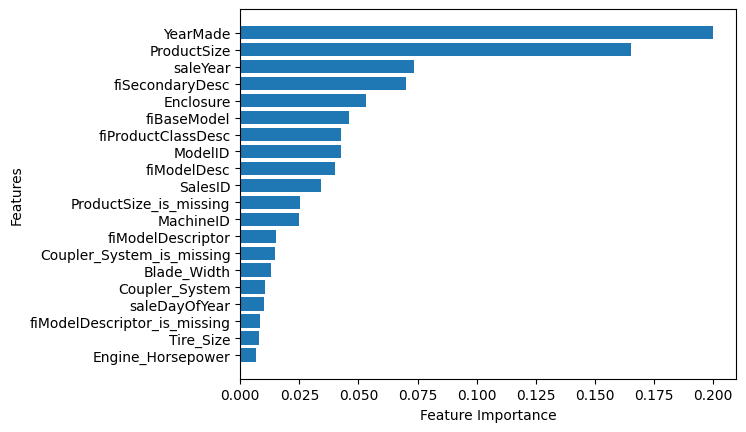

In [151]:
plot_features(X_train.columns, feature_importances, n=20)

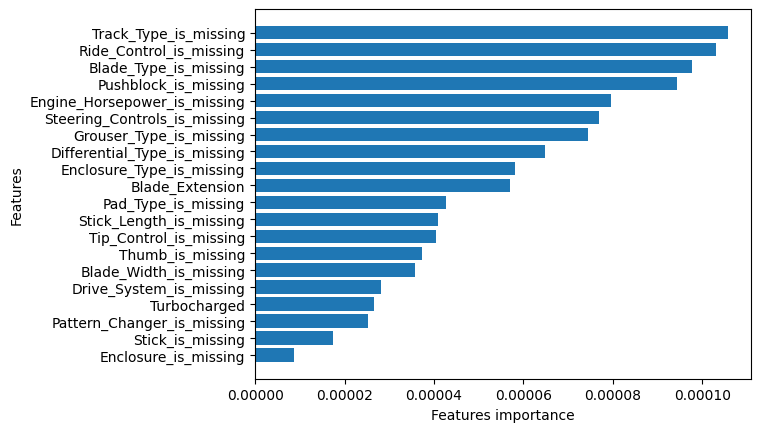

In [157]:
feature_importances_df = (pd.DataFrame({
        "features": X_train.columns,
        "feature_importances": feature_importances
}).sort_values("feature_importances", ascending=False).reset_index(drop=True))

#plot the dataframe
fig, ax = plt.subplots()
ax.barh(feature_importances_df["features"][-20:], feature_importances_df["feature_importances"][-20:])
ax.set_ylabel("Features")
ax.set_xlabel("Features importance")
ax.invert_yaxis()



In [154]:
feature_importances_df.tail(10)

,features,feature_importances
85,Pad_Type_is_missing,0.000043
86,Stick_Length_is_missing,0.000041
87,Tip_Control_is_missing,0.000040
88,Thumb_is_missing,0.000037
89,Blade_Width_is_missing,0.000036
90,Drive_System_is_missing,0.000028
91,Turbocharged,0.000027
92,Pattern_Changer_is_missing,0.000025
93,Stick_is_missing,0.000018
94,Enclosure_is_missing,0.000009


In [155]:
not_important_features = feature_importances_df[feature_importances_df['feature_importances'] < 0.000005]
not_important_features 

,features,feature_importances
